<small><i>June 2016 - This notebook was created by [Jordi Vitrià](http://www.ub.edu/cvub/jordivitria/). Source and [license](./LICENSE.txt) info are in the folder.</i></small>

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns
import bokeh.plotting as bp
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_regression 
from scipy import stats 
from bokeh.models import  WheelZoomTool, ResetTool, PanTool
%matplotlib inline

# Basic Concepts I

## What is "learning from data"?

> In general **Learning from Data** is a scientific discipline that is concerned with the design and development of algorithms that allow computers to infer (from data) a  model that allows *compact representation* (unsupervised learning) and/or *good generalization* (supervised learning).

This is an important technology because it enables computational systems to adaptively improve their performance with experience accumulated from the observed data. 

Most of these algorithms are based on the *iterative solution* of a mathematical problem that involves data and model. If there was an analytical solution to the problem, this should be the adopted one, but this is not the case for most of the cases.

So, the most common strategy for **learning from data** is based on solving a system of equations as a way to find a series of parameters of the model that minimizes a mathematical problem. This is called **optimization**.

The most important technique for solving optimization problems is **gradient descend**.

## Preliminary: Nelder-Mead method for function minimization.

> See "An Interactive Tutorial on Numerical Optimization": http://www.benfrederickson.com/numerical-optimization/

The most simple thing we can try to minimize a function $f(x)$ would be to sample two points relatively near each other, and just repeatedly take a step down away from the largest value.  

The Nelder-Mead method dynamically adjusts the step size based off the loss of the new point. If the new point is better than any previously seen value, it expands the step size to accelerate towards the bottom. Likewise if the new point is worse it contracts the step size to converge around the minima. The usual settings are to half the step size when contracting and double the step size when expanding. 

This method can be easily extended into higher dimensional examples, all thats required is taking one more point than there are dimensions - and then reflecting the worst point around the rest of the points to take a step down.

## Gradient descend (for *hackers*) for function minimization: 1-D

Let's suppose that we have a function $f: \Re \rightarrow \Re$. For example: 

$$f(x) = x^2$$

Our objective is to find the argument  $x$ that minimizes this function (for maximization, consider $-f(x)$). To this end, the critical concept is the **derivative**.

The derivative of $f$ of a variable $x$, $f'(x)$ or $\frac{\mathrm{d}f}{\mathrm{d}x}$,  is a measure of the rate at which the value of the function changes with respect to the change of the variable. It is defined as the following limit:


$$ f'(x) = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h} $$

The derivative specifies how to scale a small change in the input in order to obtain the corresponding change in the output: 

$$ f(x + h) \approx f(x) + h f'(x)$$

In [4]:
# numerical derivative at a point x

def f(x):
    return x**2

def fin_dif(x, f, h = 0.00001):
    '''
    This method returns the derivative of f at x
    by using the finite difference method
    '''
    return (f(x+h) - f(x))/h

x = 2.0
print "{:2.4f}".format(fin_dif(x,f))

4.0000


The limit as $h$ approaches zero, if it exists, should represent the **slope of the tangent line** to $(x, f(x))$. 

For values that are not zero it is only an approximation.

In [5]:
for h in np.linspace(0.0, 1.0 , 5):
    print "{:3.6f}".format(f(5+h)), "{:3.6f}".format(f(5)+h*fin_dif(5,f))

25.000000 25.000000
27.562500 27.500002
30.250000 30.000005
33.062500 32.500007
36.000000 35.000010


<function matplotlib.pyplot.show>

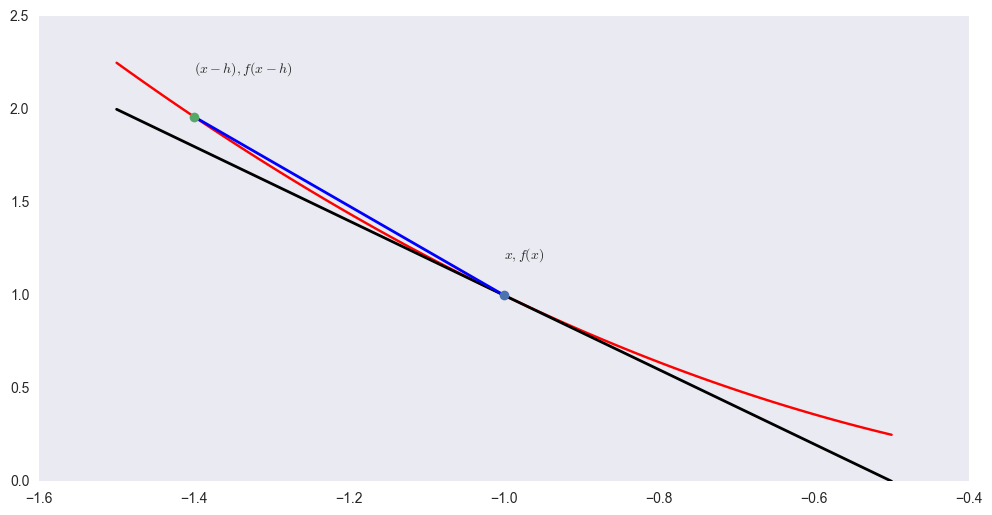

In [6]:
x = np.linspace(-1.5,-0.5, 100)
f = [i**2 for i in x]
plt.plot(x,f, 'r-')
plt.plot([-1.5, -0.5], [2, 0.0], 'k-', lw=2)
plt.plot([-1.4, -1.0], [1.96, 1.0], 'b-', lw=2)
plt.plot([-1],[1],'o')
plt.plot([-1.4],[1.96],'o')
plt.text(-1.0, 1.2, r'$x,f(x)$')
plt.text(-1.4, 2.2, r'$(x-h),f(x-h)$')
plt.gcf().set_size_inches((12,6))
plt.grid()
plt.show

It can be shown that the “centered difference formula" is better when computing numerical derivatives:

$$ \lim_{h \rightarrow 0} \frac{f(x + h) - f(x - h)}{2h} $$

The error in the "finite difference" approximation can be derived from Taylor's theorem and, assuming that $f$ is differentiable, is $O(h)$. In the case of “centered difference" the error is $O(h^2)$.

The derivative tells how to chage $x$ in order to make a small improvement in $f$. 

Then, we can follow these steps to decrease the value of the function:

+ Start from a random $x$ value.
+ Compute the derivative $f'(x) = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x - h)}{2h}$.
+ Walk a small step in the **opposite** direction of the derivative, because we know that $f(x - h \mbox{ sign}(f'(x))$ is less than $f(x)$ for  small enough $h$. 

The search for the minima ends when the derivative is zero because we have no more information about which direction to move. $x$ is a critical o stationary point if $f'(x)=0$. 

 + A **minimum (maximum)** is a critical point where $f(x)$ is lower (higher) than at all neighboring points. 
 + There is a third class of critical points: **saddle points**.

If $f$ is a **convex function**, this should be the minimum (maximum) of our functions. In other cases it could be a local minimum (maximum) or a saddle point.

In [10]:
W = 400
H = 250
bp.output_notebook()

Loading BokehJS ...

In [11]:
x = np.linspace(-15,15,100)
y = x**2

TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]

s1 = bp.figure(width=W, plot_height=H, 
               title='Local minimum of function',  
               tools=TOOLS)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.circle(0, 0, size =10, color="orange")
s1.title_text_font_size = '12pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"

bp.show(s1)

In [12]:
x = np.linspace(-15,15,100)
y = -x**2

TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]


s1 = bp.figure(width=W, plot_height=H, 
               title='Local maximum of function',  
               tools=TOOLS)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.circle(0, 0, size =10, color="orange")
s1.title_text_font_size = '12pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"

bp.show(s1)

In [13]:
x = np.linspace(-15,15,100)
y = x**3

TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]


s1 = bp.figure(width=W, plot_height=H, 
               title='Saddle point of function',  
               tools=TOOLS)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.circle(0, 0, size =10, color="orange")
s1.title_text_font_size = '12pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"

bp.show(s1)

There are two problems with numerical derivatives:
+ It is approximate.
+ It is very slow to evaluate (two function evaluations: $f(x + h) , f(x - h)$ ).

Our knowledge from Calculus could help!

We know that we can get an **analytical expression** of the derivative for **some** functions. 

For example, let's suppose we have a simple quadratic function, $f(x)=x^2−6x+5$, and we want to find the minimum of this function. 

#### First approach

We can solve this analytically using Calculus, by finding the derivate $f'(x)  =  2x-6$ and setting it to zero:

\begin{equation}
\begin{split}
2x-6  & = & 0 \\
2x  & = & 6 \\
x & = & 3 \\
\end{split}
\end{equation} 

In [14]:
x = np.linspace(-10,20,100)
y = x**2 - 6*x + 5
 
TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]


s1 = bp.figure(width=W, plot_height=H, 
               tools=TOOLS)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.circle(3, 3**2 - 6*3 + 5, size =10, color="orange")
s1.title_text_font_size = '12pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"

bp.show(s1)

#### Second approach

To find the local minimum using **gradient descend**: you start at a random point, and move into the direction of steepest **descent** relative to the derivative:

+ Start from a random $x$ value.
+ Compute the derivative $f'(x)$ analitically.
+ Walk a small step in the **opposite** direction of the derivative. 

In this example, let's suppose we start at $x=15$. The derivative at this point is $2×15−6=24$. 

Because we're using gradient descent, we need to subtract the gradient from our $x$-coordinate: $f(x - f'(x))$. However, notice that $15−24$ gives us $−9$, clearly overshooting over target of $3$. 

In [15]:
x = np.linspace(-10,20,100)
y = x**2 - 6*x + 5
start = 15

TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]


s1 = bp.figure(width=W, plot_height=H, 
               tools=TOOLS)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.circle(start, start**2 - 6*start + 5, size =10, color="orange")

d = 2 * start - 6
end = start - d

s1.circle(end, end**2 - 6*end + 5, size =10, color="red")
s1.title_text_font_size = '12pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"

bp.show(s1)

To fix this, we multiply the gradient by a step size. This step size (often called **alpha**) has to be chosen carefully, as a value too small will result in a long computation time, while a value too large will not give you the right result (by overshooting) or even fail to converge. 

In this example, we'll set the step size to 0.01, which means we'll subtract $24×0.01$ from $15$, which is $14.76$. 

This is now our new temporary local minimum: We continue this method until we either don't see a change after we subtracted the derivative step size, or until we've completed a pre-set number of iterations.

In [16]:
old_min = 0
temp_min = 15
step_size = 0.01
precision = 0.0001
 
def f_derivative(x):
    import math
    return 2*x -6

mins = []
cost = []

while abs(temp_min - old_min) > precision:
    old_min = temp_min 
    gradient = f_derivative(old_min) 
    move = gradient * step_size
    temp_min = old_min - move
    cost.append((3-temp_min)**2)
    mins.append(temp_min)

# rounding the result to 2 digits because of the step size
print "Local minimum occurs at {:3.2f}.".format(round(temp_min,2))

Local minimum occurs at 3.00.


An important feature of gradient descent is that **there should be a visible improvement over time**: In this example, we simply plotted the squared distance from the local minima calculated by gradient descent and the true local minimum,  ``cost``, against the iteration during which it was calculated. As we can see, the distance gets smaller over time, but barely changes in later iterations. 

In [17]:
TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]


x, y = (zip(*enumerate(cost)))
s1 = bp.figure(width=W, 
               height=H, 
               title='Squared distance to true local minimum',  
#                title_text_font_size='14pt', 
               tools=TOOLS,
               x_axis_label = 'Iteration',
               y_axis_label = 'Distance'
)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.title_text_font_size = '16pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"


bp.show(s1)

## From derivatives to gradient: $n$-dimensional function minimization.

Let's consider a $n$-dimensional function $f: \Re^n \rightarrow \Re$. For example: 

$$f(\mathbf{x}) = \sum_{n} x_n^2$$

Our objective is to find the argument  $\mathbf{x}$ that minimizes this function.

The **gradient** of $f$ is the vector whose components are the $n$ partial derivatives of $f$. It is thus a vector-valued function. 

The gradient points in the direction of the greatest rate of **increase** of the function.

$$\nabla {f} = (\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_n})$$

In [16]:
def f(x):
    return sum(x_i**2 for x_i in x)

def fin_dif_partial_centered(x, f, i, h=1e-6):
    w1 = [x_j + (h if j==i else 0) for j, x_j in enumerate(x)]
    w2 = [x_j - (h if j==i else 0) for j, x_j in enumerate(x)]
    return (f(w1) - f(w2))/(2*h)

def fin_dif_partial_old(x, f, i, h=1e-6):
    w1 = [x_j + (h if j==i else 0) for j, x_j in enumerate(x)]
    return (f(w1) - f(x))/h

def gradient_centered(x, f, h=1e-6):
    return[round(fin_dif_partial_centered(x,f,i,h), 10) for i,_ in enumerate(x)]

def gradient_old(x, f, h=1e-6):
    return[round(fin_dif_partial_old(x,f,i,h), 10) for i,_ in enumerate(x)]

x = [1.0,1.0,1.0]

print f(x), gradient_centered(x,f)
print f(x), gradient_old(x,f) 

3.0 [2.0000000001, 2.0000000001, 2.0000000001]
3.0 [2.0000009999, 2.0000009999, 2.0000009999]


The function we have evaluated, $f({\mathbf x}) = x_1^2+x_2^2+x_3^2$, is $3$ at $(1,1,1)$ and the gradient vector at this point is $(2,2,2)$. 

Then, we can follow this steps to maximize (or minimize) the function:

+ Start from a random $\mathbf{x}$ vector.
+ Compute the gradient vector.
+ Walk a small step in the opposite direction of the gradient vector.

> It is important to be aware that this gradient computation is very expensive: if $\mathbf{x}$ has dimension $n$, we have to evaluate $f$ at $2*n$ points.


### How to use the gradient.

$f(x) = \sum_i x_i^2$, takes its mimimum value when all $x$ are 0. 

Let's check it for $n=3$: 

In [18]:
def euc_dist(v1,v2):
    import numpy as np
    import math
    v = np.array(v1)-np.array(v2)
    return math.sqrt(sum(v_i ** 2 for v_i in v))

Let's start by choosing a random vector and then walking a step in the opposite direction of the gradient vector. We will stop when the difference between the new solution and the old solution is less than a tolerance value.

In [19]:
# choosing a random vector

import random
import numpy as np

x = [random.randint(-10,10) for i in range(3)]
x

[-2, 5, 4]

In [19]:
def step(x,grad,alpha):
    return [x_i - alpha * grad_i for x_i, grad_i in zip(x,grad)]

tol = 1e-15
alpha = 0.01
while True:
    grad = gradient_centered(x,f)
    next_x = step(x,grad,alpha)
    if euc_dist(next_x,x) < tol:
        break
    x = next_x
print [round(i,10) for i in x]

[-0.0, 0.0, 0.0]


### Alpha

The step size, **alpha**, is a slippy concept: if it is too small we will slowly converge to the solution, if it is too large we can diverge from the solution. 

There are several policies to follow when selecting the step size:

+ Constant size steps. In this case, the size step determines the precision of the solution.
+ Decreasing step sizes.
+ At each step, select the optimal step.

The last policy is good, but too expensive. In this case we would consider a fixed set of values:

In [17]:
step_size = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

## Learning from data

In general, we have:

+ A dataset $(\mathbf{x},y)$. 
+ A target function $f_\mathbf{w}$, that we want to minimize, representing the **discrepancy between our data and the model** we want to fit. The model is represented by a set of parameters $\mathbf{w}$. 
+ The gradient of the target function, $g_f$. 


In the most common case $f$ represents the errors from a data representation model $M$. To fit the model is to find the optimal parameters $\mathbf{w}$ that minimize the following expression:

$$ f_\mathbf{w} = \sum_{i} (y_i - M(\mathbf{x}_i,\mathbf{w}))^2 $$

For example, $(\mathbf{x},y)$ can represent:

+ $\mathbf{x}$: the behavior of a "Candy Crush" player; $y$: monthly payments. 
+ $\mathbf{x}$: sensor data about your car engine; $y$: probability of engine error.
+ $\mathbf{x}$: finantial data of a bank customer; $y$: customer rating.

> If $y$ is a real value, it is called a *regression* problem.

> If $y$ is binary/categorical, it is called a *classification* problem. 

Let's suppose that $M(\mathbf{x},\mathbf{w}) = \mathbf{w} \cdot \mathbf{x}$. 

### Batch gradient descend

We can implement **gradient descend** in the following way (*batch gradient descend*):

In [21]:
# f = 2x
x = range(100)
y = [2*i for i in x]

# f_target = Sum (y - wx)**2
def target_f(x,y,w):
    import numpy as np
    return np.sum((np.array(y) - np.array(x) * w)**2.0)

# gradient_f = Sum 2wx**2 - 2xy
def gradient_f(x,y,w):
    import numpy as np
    return np.sum(2*w*(np.array(x)**2) - 2*np.array(x)*np.array(y))

def step(w,grad,alpha):
    return w - alpha * grad

def min_batch(target_f, gradient_f, x, y, toler = 1e-6):
    import random
    alphas = [100, 10, 1, 0.1, 0.001, 0.00001]
    w = random.random()
    val = target_f(x,y,w)
    print "First w:", w, "First Val:", val, "\n"
    i = 0
    while True:
        i += 1
        gradient = gradient_f(x,y,w)
        next_ws = [step(w, gradient, alpha) for alpha in alphas]
        next_vals = [target_f(x,y,w) for w in next_ws]
        min_val = min(next_vals)
        next_w = next_ws[next_vals.index(min_val)]   
        next_val = target_f(x,y,next_w)
        print i, "w: {:4.4f}".format(w), "Val:{:4.4f}".format(val), "Gradient:", gradient        
        if (abs(val - next_val) < toler) or (i>200):
            return w
        else:
            w, val = next_w, next_val
            
min_batch(target_f, gradient_f, x, y)

First w: 0.537744150296 First Val: 702075.399017 

1 w: 10.1404 Val:702075.3990 Gradient: -960263.416501
2 w: -43.3175 Val:21758362.0058 Gradient: 5345786.43966
3 w: 254.2824 Val:674324036.7612 Gradient: -29759993.1096
4 w: -1402.4564 Val:20898305967.7201 Gradient: 165673881.641
5 w: 7820.6086 Val:647669619517.2316 Gradient: -922306499.096
6 w: -43524.1942 Val:20072245888902.4648 Gradient: 5134480280.47
7 w: 242312.3230 Val:622068787671216.2500 Gradient: -28583651721.3
8 w: -1348939.5683 Val:19278837990355840.0000 Gradient: 159125189133.0
9 w: 7509559.7107 Val:597479895510895232.0000 Gradient: -885849927902.0
10 w: -41805705.7756 Val:18516791609447063552.0000 Gradient: 4.93152654863e+12
11 w: 232732377.1867 Val:573862943479471079424.0000 Gradient: -2.74538082962e+13
12 w: -1295621130.6642 Val:17784867100351661080576.0000 Gradient: 1.52835350785e+14
13 w: 7212722847.5418 Val:551179513107010602139648.0000 Gradient: -8.50834397821e+14
14 w: -40153228079.1312 Val:17081873817481277608034304

1.0836495378567022e+150

In [19]:
# Exercise: 
# 1. Consider a set of 100 data points and explain the behavior of the algorithm. 
# 2. How could we fix this behavior?

### Stochastic Gradient Descend

The last function evals the whole dataset $(\mathbf{x}_i,y_i)$ at every step. 

If the dataset is large, this strategy is too costly. In this case we will use a strategy called **SGD** (*Stochastic Gradient Descend*).

When learning from data, the cost function is additive: it is computed by adding sample reconstruction errors. 

Then, we can compute the estimate the gradient (and move towards the minimum) by using only **one data sample** (or a small data sample).

Thus, we will find the minimum by iterating this gradient estimation over the dataset.

A full iteration over the dataset is called **epoch**. During an epoch, data must be used in a random order.

If we apply this method we have some theoretical guarantees to find the minimum. 

In [25]:
import numpy as np
x = range(10)
y = [2*i for i in x]
data = zip(x,y)

def in_random_order(data):
    import random
    indexes = [i for i,_ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]
        
for (x_i,y_i) in in_random_order(data):
    print x_i,y_i 

 5 10
0 0
9 18
3 6
1 2
7 14
2 4
6 12
8 16
4 8


In [26]:
def gradient_f_SGD(x,y,w):
    import numpy as np
    return 2*w*(np.array(x)**2) - 2*np.array(x)*np.array(y)

def SGD(target_f, gradient_f, x, y, alpha_0=0.01):
    import numpy as np
    import random
    data = zip(x,y)
    w = random.random()
    alpha = alpha_0
    min_w, min_val = float('inf'), float('inf')
    iteration_no_increase = 0
    while iteration_no_increase < 100:
        val = sum(target_f(x_i, y_i, w) for x_i,y_i in data)
        if val < min_val:
            min_w, min_val = w, val
            iteration_no_increase = 0
            alpha = alpha_0
        else:
            iteration_no_increase += 1
            alpha *= 0.9
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_f(x_i, y_i, w)
            w = np.array(w) - (alpha *  np.array(gradient_i))
    return min_w

In [27]:
print "w:", SGD(target_f, gradient_f_SGD, x, y, 0.01)

w: 2.0


## Exercise: Gradient Descent and Linear Regression

The linear regression model assumes a linear relationship between data:

$$ y_i = w_1 x_i + w_0 $$

Let's generate a more realistic dataset (with noise), where $w_1 = 2$ and $w_0 = 0$:

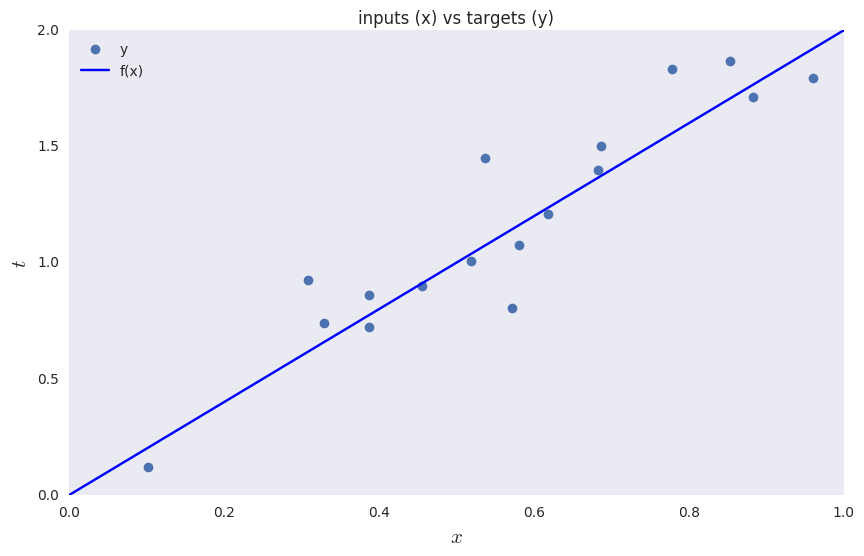

In [28]:
import numpy as np
x = np.random.uniform(0,1,20)

def f(x): return x*2

noise_variance =0.2
noise = np.random.randn(x.shape[0])*noise_variance
y = f(x) + noise

plt.plot(x, y, 'o', label='y')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((10,6))
plt.show()

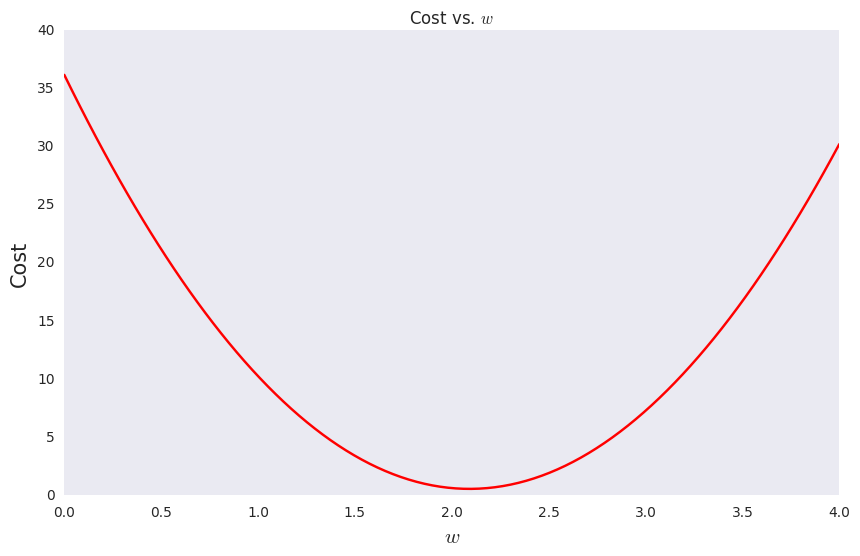

In [29]:
# Our model y = x * w
def nn(x, w): return x * w

# Our cost function
def cost(y, t): return ((t - y)**2).sum()

ws = np.linspace(0, 4, num=100)  
cost_ws = np.vectorize(lambda w: cost(nn(x, w) , y))(ws)  

# Ploting the cost function
plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$w$', fontsize=15)
plt.ylabel('Cost', fontsize=15)
plt.title('Cost vs. $w$')
plt.grid()
plt.gcf().set_size_inches((10,6))
plt.show()

Complete the following code and look at the plot of the first gradient descent updates. Explore the behavior of the proposed learning rates.

In [30]:
def gradient(w, x, y): 
    return 2 * x * (nn(x, w) - y)

def step(w_k, x, y, learning_rate):
    return learning_rate * gradient(w_k, x, y).sum()

w = 0.01

# define a learning_rate 
learning_rate = 0.1

nb_of_iterations = 20  
w_cost = [(w, cost(nn(x, w), y))] 
for i in range(nb_of_iterations):
    # Here your code 
    w_cost.append((w, cost(nn(x, w), y)))  
    
for i in range(0, len(w_cost)):
    print('w({}): {:.4f} \t cost: {:.4f}'.format(i, w_cost[i][0], w_cost[i][1]))

w(0): 0.0100 	 cost: 35.8301
w(1): 0.0100 	 cost: 35.8301
w(2): 0.0100 	 cost: 35.8301
w(3): 0.0100 	 cost: 35.8301
w(4): 0.0100 	 cost: 35.8301
w(5): 0.0100 	 cost: 35.8301
w(6): 0.0100 	 cost: 35.8301
w(7): 0.0100 	 cost: 35.8301
w(8): 0.0100 	 cost: 35.8301
w(9): 0.0100 	 cost: 35.8301
w(10): 0.0100 	 cost: 35.8301
w(11): 0.0100 	 cost: 35.8301
w(12): 0.0100 	 cost: 35.8301
w(13): 0.0100 	 cost: 35.8301
w(14): 0.0100 	 cost: 35.8301
w(15): 0.0100 	 cost: 35.8301
w(16): 0.0100 	 cost: 35.8301
w(17): 0.0100 	 cost: 35.8301
w(18): 0.0100 	 cost: 35.8301
w(19): 0.0100 	 cost: 35.8301
w(20): 0.0100 	 cost: 35.8301


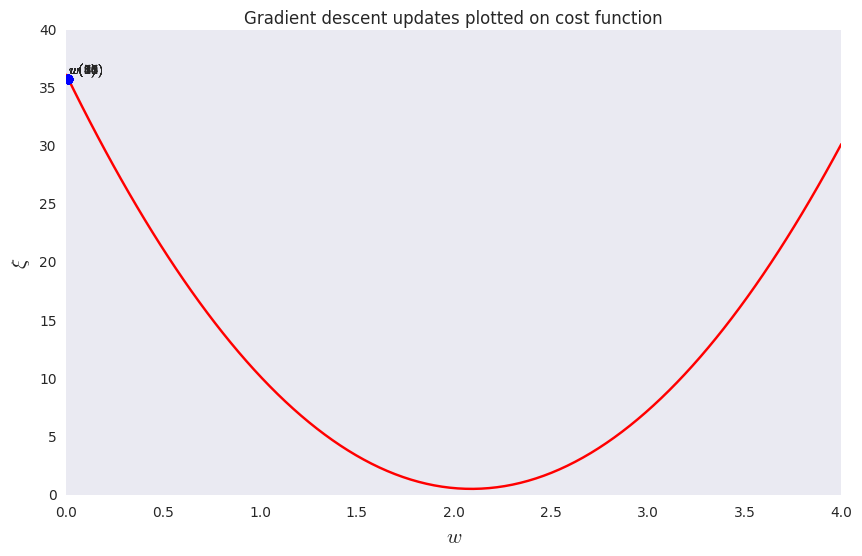

In [31]:
# Plotting the first gradient descent updates
plt.plot(ws, cost_ws, 'r-')  # Plot the error curve
# Plot the updates
for i in range(1, len(w_cost)-2):
    w1, c1 = w_cost[i-1]
    w2, c2 = w_cost[i]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.5, '$w({})$'.format(i)) 
# Plot the last weight, axis, and show figure
w1, c1 = w_cost[len(w_cost)-3]
plt.plot(w1, c1, 'bo')
plt.text(w1, c1+0.5, '$w({})$'.format(nb_of_iterations))  
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('Gradient descent updates plotted on cost function')
plt.grid()
plt.gcf().set_size_inches((10,6))
plt.show()

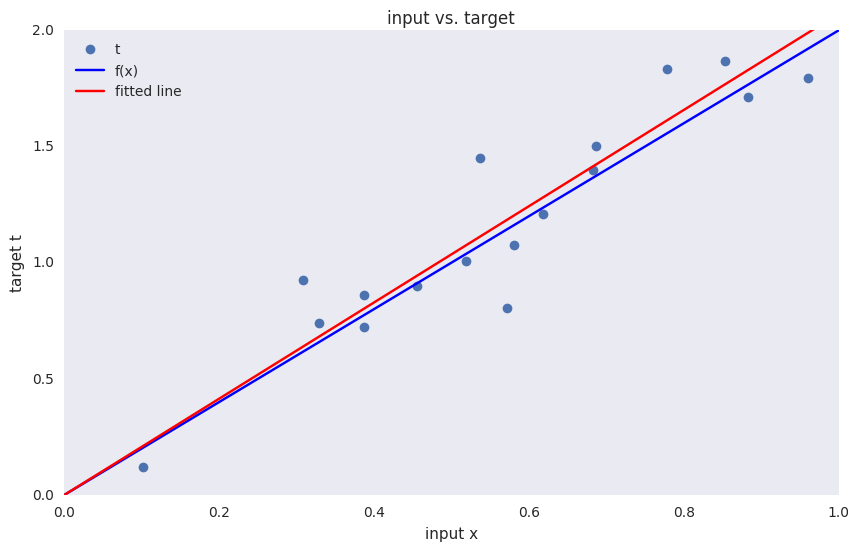

In [32]:
w = 0
nb_of_iterations = 10  
for i in range(nb_of_iterations):
    dw = step(w, x, y, learning_rate)  
    w = w - dw  
    

plt.plot(x, y, 'o', label='t')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.plot([0, 1], [0*w, 1*w], 'r-', label='fitted line')
plt.xlabel('input x')
plt.ylabel('target t')
plt.ylim([0,2])
plt.title('input vs. target')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((10,6))
plt.show()

## Mini-batch Gradient Descent

In code, general batch gradient descent looks something like this:

```python
nb_epochs = 100
for i in range(nb_epochs):
    grad = evaluate_gradient(target_f, data, w)
    w = w - learning_rate * grad
```

For a pre-defined number of epochs, we first compute the gradient vector of the target function for the whole dataset w.r.t. our parameter vector. 

Stochastic gradient descent (SGD) in contrast performs a parameter update for each training example and label:

```python
nb_epochs = 100
for i in range(nb_epochs):
    np.random.shuffle(data)
    for example in data:
        grad = evaluate_gradient(target_f, example, w)
        w = w - learning_rate * grad
```

Mini-batch gradient descent finally takes the best of both worlds and performs an update for every mini-batch of $n$ training examples:

```python
nb_epochs = 100
for i in range(nb_epochs):
  np.random.shuffle(data)
  for batch in get_batches(data, batch_size=50):
    grad = evaluate_gradient(target_f, batch, w)
    w = w - learning_rate * grad
```

Minibatch SGD has the advantage that it works with a slightly less noisy estimate of the gradient. However, as the minibatch size increases, the number of updates done per computation done decreases (eventually it becomes very inefficient, like batch gradient descent). 

There is an optimal trade-off (in terms of computational efficiency) that may vary depending on the data distribution and the particulars of the class of function considered, as well as how computations are implemented.

## Loss Funtions

Loss functions $L(y, f(\mathbf{x})) = \sum_i \ell(y_i, f(\mathbf{x_i}))$ represent the price paid for inaccuracy of predictions in classification/regression problems.

In classification this function is often the **zero-one loss**, that is, $ \ell(y_i, f(\mathbf{x_i}))$ is zero when $y_i = f(\mathbf{x}_i)$ and one otherwise.

This function is discontinuous with flat regions and is thus extremely hard to optimize using gradient-based methods. For this reason it is usual to consider a proxy to the loss called a *surrogate loss function*. For computational reasons this is usually convex function. Here we have some examples:

### Square / Euclidean Loss (Linear Regression)

In regression problems, the most common loss function is the square loss function:

$$ L(y, f(\mathbf{x})) = \sum_i (y_i - f(\mathbf{x}_i))^2  $$


The square loss function can be re-written and utilized for classification:

$$ L(y, f(\mathbf{x})) = \sum_i (1 - y_i f(\mathbf{x}_i))^2  $$



### Hinge / Margin Loss (Suport Vector Machines)

The hinge loss function is defined as:

$$ L(y, f(\mathbf{x})) = \sum_i \mbox{max}(0, 1 - y_i f(\mathbf{x}_i))  $$

The hinge loss provides a relatively tight, convex upper bound on the 0–1 Loss.


<img src="images/loss_functions.png">


### Logistic Loss (Logistic Regression)

This function displays a similar convergence rate to the hinge loss function, and since it is continuous, gradient descent methods can be utilized. 

$$ L(y, f(\mathbf{x})) = log(1 + exp(-y_i f(\mathbf{x}_i))) $$

### Sigmoid Cross-Entropy Loss (Softmax classifier)

Cross-Entropy is a loss function that is very used for training multiclass problems. We'll focus on models that assume that classes are mutually exclusive. In this case, our labels have this form $\mathbf{y}_i =(1.0,0.0,0.0)$. If our model predicts a different distribution, say  $ f(\mathbf{x}_i)=(0.4,0.1,0.5)$, then we'd like to nudge the parameters so that $f(\mathbf{x}_i)$ gets closer to $\mathbf{y}_i$.

C.Shannon showeed that if you want to send a series of messages composed of symbols from an alphabet with distribution $y$ ($y_j$  is the probability of the  $j$-th symbol), then to use the smallest number of bits on average, you should assign  $\log(\frac{1}{y_j})$  bits to the  $j$-th symbol. 

The optimal number of bits is known as **entropy**:

$$ H(\mathbf{y}) = \sum_j y_j \log\frac{1}{y_j} = - \sum_j y_j \log y_j$$

**Cross entropy** is the number of bits we'll need if we encode symbols by using a wrong distribution $\hat y$:

$$ H(y, \hat y) =   - \sum_j y_j \log \hat y_j $$ 

In our case, the real distribution is $\mathbf{y}$ and the "wrong" one is $f(\mathbf{x}_i)$. So, minimizing **cross entropy** with respect our model parameters will result in the model that best approximates our labels if considered as a probabilistic distribution. 

Cross entropy is used in combination with **Softmax** classifier. In order to classify $\mathbf{x}_i$ we could take the index corresponding to the max value of $f(\mathbf{x}_i)$, but Softmax gives a slightly more intuitive output (normalized class probabilities) and also has a probabilistic interpretation:

$$ P(\mathbf{y}_i = j \mid \mathbf{x_i}) = - log \left( \frac{e^{f_j(\mathbf{x_i})}}{\sum_k e^{f_k(\mathbf{x_i})} } \right) $$

where $f_k$ is a linear classifier. 


## Advanced gradient descend

> See "An Interactive Tutorial on Numerical Optimization": http://www.benfrederickson.com/numerical-optimization/


### Momentum

SGD has trouble navigating ravines, i.e. areas where the surface curves much more steeply in one dimension than in another, which are common around local optima. In these scenarios, SGD oscillates across the slopes of the ravine while only making hesitant progress along the bottom towards the local optimum.

<img src="images/ridge2.png">

Momentum is a method that helps accelerate SGD in the relevant direction and dampens oscillations. It does this by adding a fraction of the update vector of the past time step to the current update vector:

$$ v_t = m v_{t-1} + \alpha \nabla_w f $$
$$ w = w - v_t    $$

The momentum $m$ is commonly set to $0.9$.

### Nesterov

However, a ball that rolls down a hill, blindly following the slope, is highly unsatisfactory. We'd like to have a smarter ball, a ball that has a notion of where it is going so that it knows to slow down before the hill slopes up again.

Nesterov accelerated gradient (NAG) is a way to give our momentum term this kind of prescience. We know that we will use our momentum term $m v_{t-1}$ to move the parameters $w$. Computing 
$w - m v_{t-1}$ thus gives us an approximation of the next position of the parameters (the gradient is missing for the full update), a rough idea where our parameters are going to be. We can now effectively look ahead by calculating the gradient not w.r.t. to our current parameters $w$ but w.r.t. the approximate future position of our parameters:

$$ w_{new} = w - m v_{t-1} $$
$$ v_t = m v_{t-1} + \alpha \nabla_{w_{new}} f $$
$$ w = w - v_t $$

### Adagrad

All previous approaches manipulated the learning rate globally and equally for all parameters. Tuning the learning rates is an expensive process, so much work has gone into devising methods that can adaptively tune the learning rates, and even do so per parameter. 

Adagrad is an algorithm for gradient-based optimization that does just this: It adapts the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters.

$$ c = c + (\nabla_w f)^2 $$
$$ w = w - \frac{\alpha}{\sqrt{c}} $$ 


### RMProp

RMSProp update adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate. In particular, it uses a moving average of squared gradients instead, giving:

$$ c = \beta c + (1 - \beta)(\nabla_w f)^2 $$
$$ w = w - \frac{\alpha}{\sqrt{c}} $$ 

where $\beta$ is a decay rate that controls the size of the moving average.


<img src="images/g1.gif">

(Image credit: Alec Radford) 

<img src="images/g2.gif">

(Image credit: Alec Radford) 
